# Análise exploratória de ponta parte 1

## Importando bibliotecas

In [1]:
# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
# Bibliotecas para manipulação
import pandas as pd
import numpy as np

## Carregando o dataset

In [2]:
insurance = pd.read_csv('/content/insurance.csv')
# Olhando as 5 primeiras linhas do DataFrame
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Criando gráfico

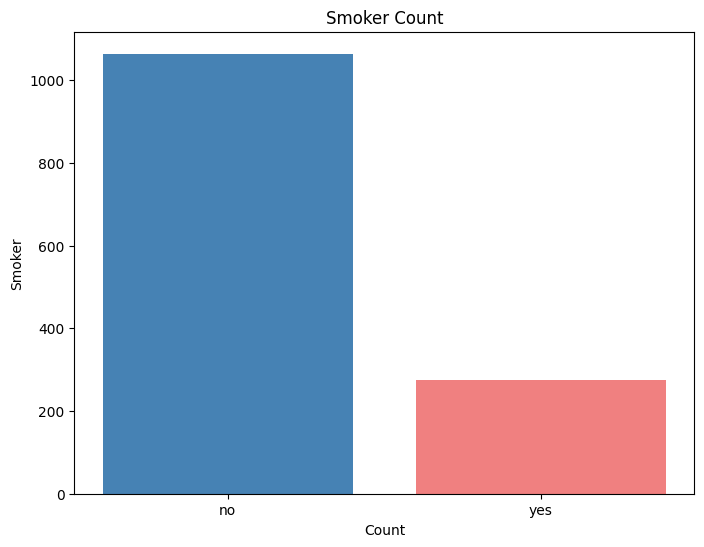

In [3]:
smoker_count = insurance['smoker'].value_counts()

plt.figure(figsize=(8, 6))

plt.bar(smoker_count.index,
        smoker_count.values,
        color = ['steelblue', 'lightcoral'])

plt.xlabel('Count')
plt.ylabel('Smoker')
plt.title('Smoker Count')
plt.show()


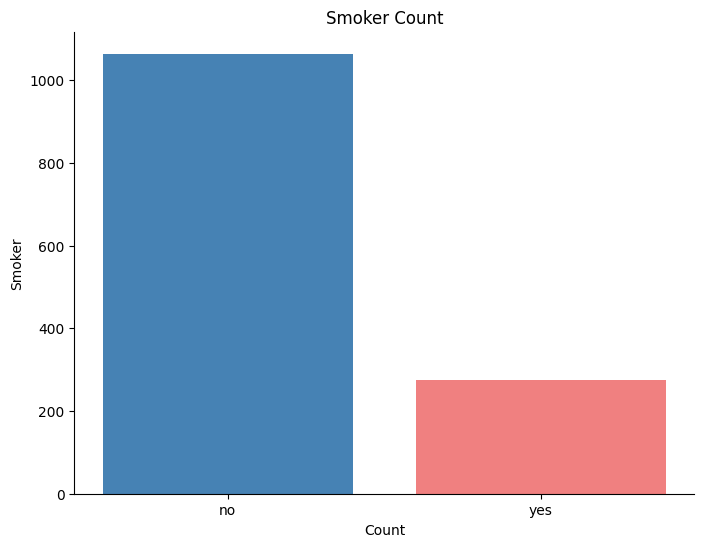

In [4]:
# Retirando as linhas de cima e da direita
smoker_count = insurance['smoker'].value_counts()

plt.figure(figsize=(8, 6))

plt.bar(smoker_count.index,
        smoker_count.values,
        color = ['steelblue', 'lightcoral'])

plt.xlabel('Count')
plt.ylabel('Smoker')
plt.title('Smoker Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


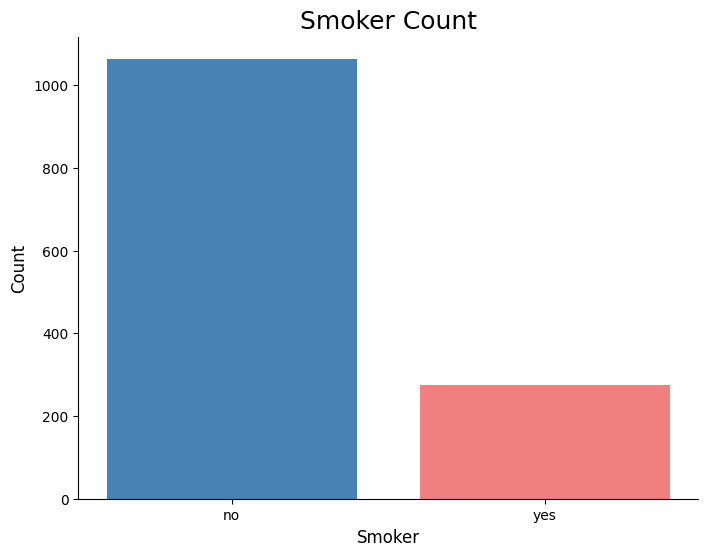

In [5]:
# Esse jeito é mais intuitivo

smoker_count = insurance['smoker'].value_counts()
colors = ['steelblue', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(smoker_count.index, smoker_count.values,
       color=colors)

ax.set_xlabel('Smoker', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Smoker Count', fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

 O uso de **_subplot_** abre espaço para o uso de *fig* e *ax*, o que facilita bastante na manutenção dos detalhes da imagem.<br> No exemplo dado, fig e ax são variáveis que representam o **objeto da figura** e o **objeto do eixo**, respectivamente, criados usando a função *subplots()*. <br>
<br>A **_figura (fig)_** é o objeto que representa a área em branco onde o gráfico será desenhado. Ela pode conter um ou mais eixos (ax). <br>**_O eixo (ax)_** é onde os elementos do gráfico, como barras, linhas, pontos, entre outros, são plotados. <br> <br>Ao criar a figura e o eixo usando 'fig, ax = plt.subplots(figsize=(8, 6))', estamos atribuindo o objeto da figura à variável fig e o objeto do eixo à variável ax.

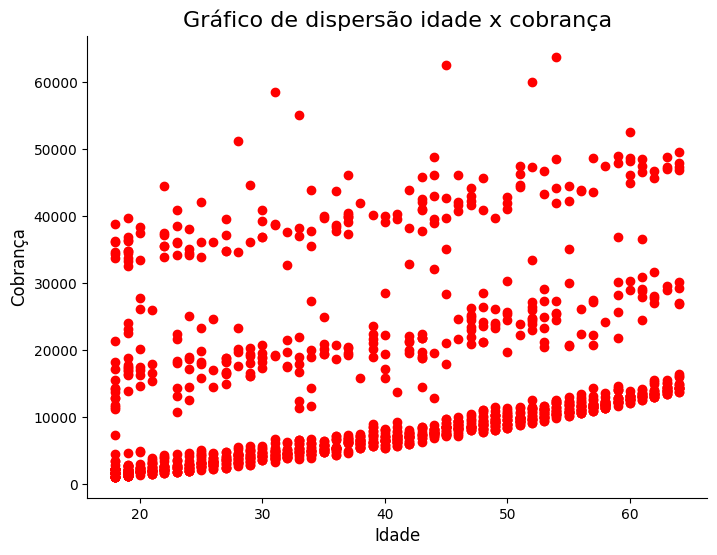

In [6]:
# Criando um scatter plot

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(insurance['age'], insurance['charges'], c='red')

ax.set_title('Gráfico de dispersão idade x cobrança', fontsize=16)
ax.set_xlabel('Idade', fontsize=12)
ax.set_ylabel('Cobrança', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Criando gráficos lado a lado

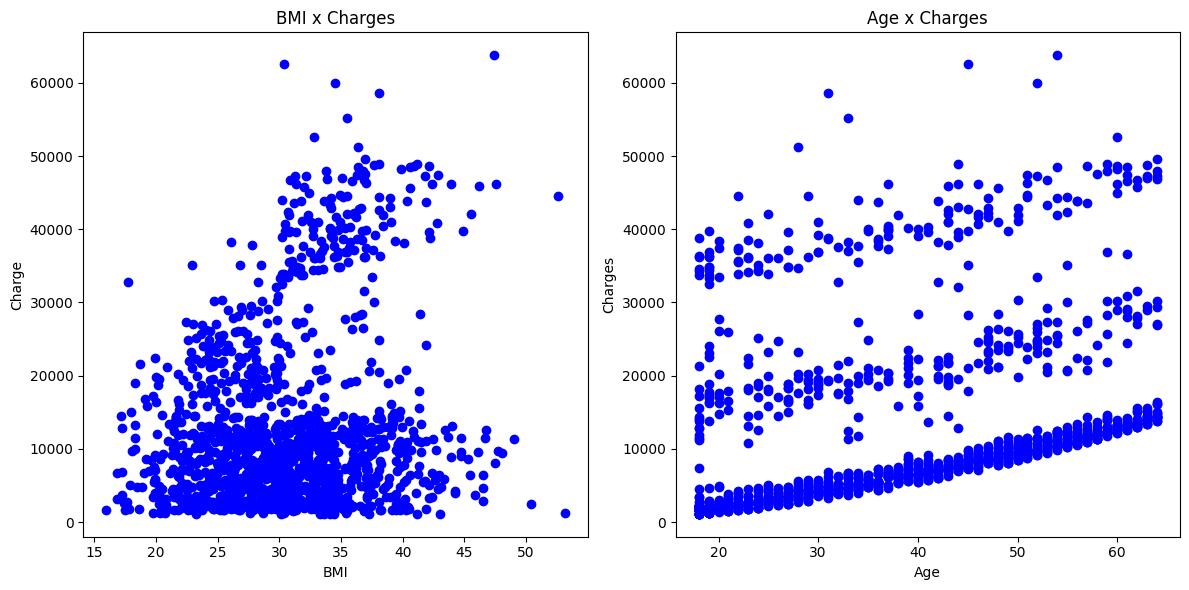

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(insurance['bmi'], insurance['charges'], c='blue')
ax[0].set_title('BMI x Charges')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Charge')

ax[1].scatter(insurance['age'], insurance['charges'], c='blue')
ax[1].set_title('Age x Charges')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()

## Criando 4 gráficos no mesmo plano

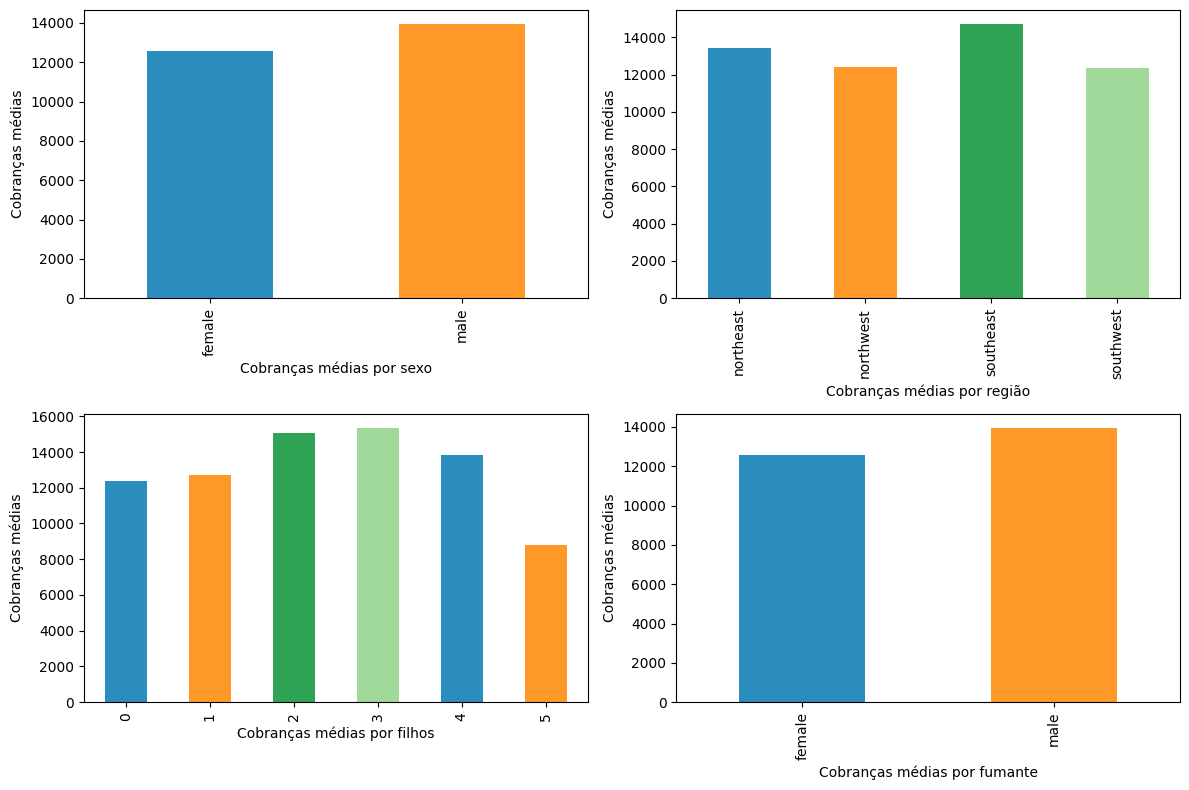

In [8]:
# Definindo os gráficos a serem plotados
mean_charges_sex = insurance.groupby('sex')['charges'].mean()
mean_charges_region = insurance.groupby('region')['charges'].mean()
mean_charges_children = insurance.groupby('children')['charges'].mean()
mean_charges_smoker = insurance.groupby('smoker')['charges'].mean()

# Definindo as cores-padrão dos gráficos
colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

# Criando a moldura
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de barras: média por sexo
mean_charges_sex.plot(kind='bar', ax=ax[0, 0], color=colors)
ax[0, 0].set_xlabel('Sexo')
ax[0, 0].set_ylabel('Cobranças médias')
ax[0, 0].set_xlabel('Cobranças médias por sexo')

# Gráfico de barras: média por região
mean_charges_region.plot(kind='bar', ax=ax[0, 1], color=colors)
ax[0, 1].set_xlabel('Região')
ax[0, 1].set_ylabel('Cobranças médias')
ax[0, 1].set_xlabel('Cobranças médias por região')

# Gráfico de barras: média por filhos
mean_charges_children.plot(kind='bar', ax=ax[1, 0], color=colors)
ax[1, 0].set_xlabel('Filhos')
ax[1, 0].set_ylabel('Cobranças médias')
ax[1, 0].set_xlabel('Cobranças médias por filhos')

# Gráfico de barras: média por fumantes
mean_charges_sex.plot(kind='bar', ax=ax[1, 1], color=colors)
ax[1, 1].set_xlabel('Fumante')
ax[1, 1].set_ylabel('Cobranças médias')
ax[1, 1].set_xlabel('Cobranças médias por fumante')

# Ajustando e exibindo
plt.tight_layout()
plt.show()

Desafio:
</br> Construa os mesmos gráficos utilizando o Matplotlib.

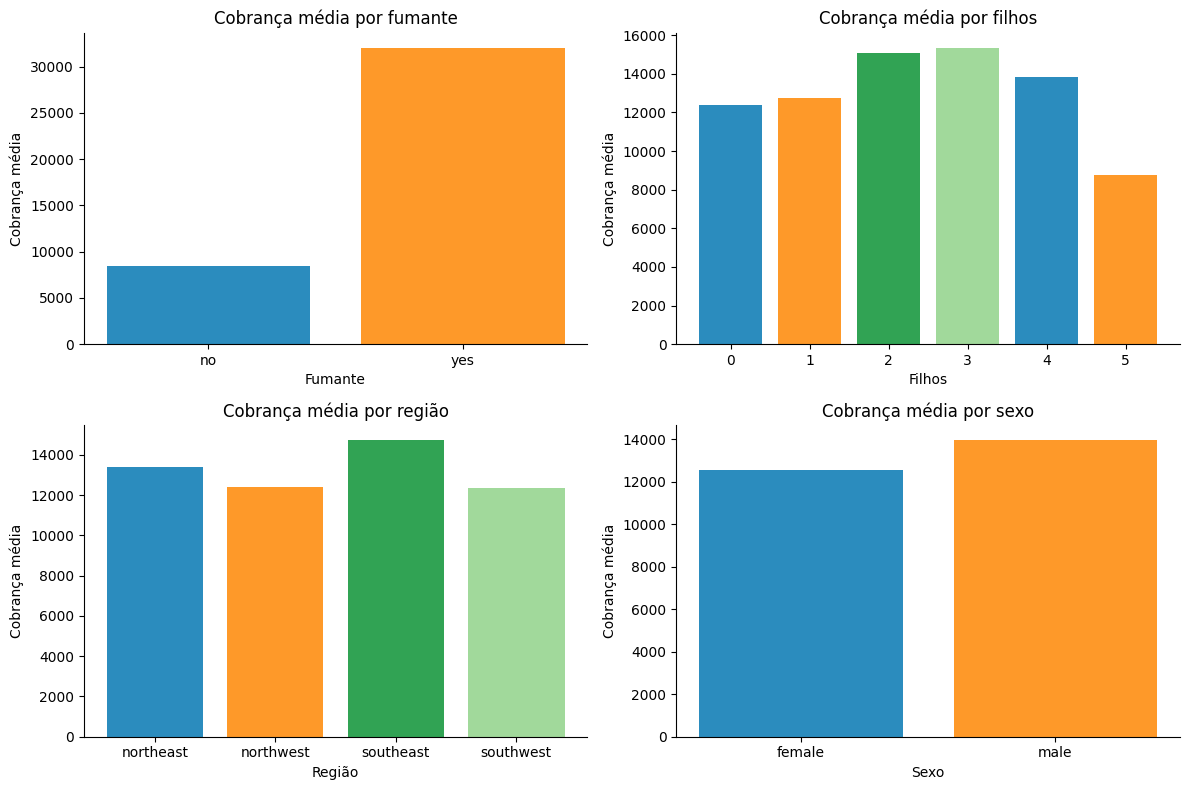

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].bar(mean_charges_smoker.index, mean_charges_smoker.values, color=colors)
ax[0, 0].set_xlabel('Fumante')
ax[0, 0].set_ylabel('Cobrança média')
ax[0, 0].set_title('Cobrança média por fumante')

ax[0, 1].bar(mean_charges_children.index, mean_charges_children.values, color=colors)
ax[0, 1].set_xlabel('Filhos')
ax[0, 1].set_ylabel('Cobrança média')
ax[0, 1].set_title('Cobrança média por filhos')

ax[1, 0].bar(mean_charges_region.index, mean_charges_region.values, color=colors)
ax[1, 0].set_xlabel('Região')
ax[1, 0].set_ylabel('Cobrança média')
ax[1, 0].set_title('Cobrança média por região')

ax[1, 1].bar(mean_charges_sex.index, mean_charges_sex.values, color=colors)
ax[1, 1].set_xlabel('Sexo')
ax[1, 1].set_ylabel('Cobrança média')
ax[1, 1].set_title('Cobrança média por sexo')

# Desafio 2: Retirar as linhas superiores e da direita
"""
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
"""

# Alternativa para o desafio 2
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)


plt.tight_layout()
plt.show()

In [10]:
plt.style.use('ggplot')

Normalmente, colocamos o plt.style.use() na primeira célula do notebook, para pré-definir os estilos dos gráficos naquele reporte. Além disso, também é possível deixar o tamanho dos gráficos já pré-definido. Utilizar o comando 'mpl.rcParams' é uma maneira de manipular a configuração de gráficos do Matplotlib globalmente em um script Python. O rcParams é um dicionário (uma instância da classe matplotlib.RcParams) que armazena os valores padrão para várias propriedades que você pode controlar no Matplotlib.

In [11]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [10, 5]

Você pode alterar muitas outras propriedades com 'rcParams', como:

- ***lines.linewidth:*** a espessura das linhas

- ***axes.titlesize:*** o tamanho da fonte do título dos eixos

- ***axes.labelsize:*** o tamanho da fonte dos rótulos dos eixos

- ***xtick.labelsize e ytick.labelsize:*** o tamanho da fonte dos rótulos dos ticks

- ***legend.fontsize:*** o tamanho da fonte da legenda

- ***figure.dpi:*** a resolução dos gráficos

#### Como estilizar vários parâmetros de uma vez?

Você pode modificar vários parâmetros seguidos, como num dicionário comum, por exemplo:

```
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['font.family'] = 'serif'
```

Ou, se quiser deixar o código mais organizado, você pode usar o método update() e passar um dicionário com várias configurações de uma só vez:

Exemplo com rcParams.update({...}):
```
import matplotlib as mpl

mpl.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.facecolor': '#f0f0f0',
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'sans-serif',
    'lines.linewidth': 2,
    'grid.linestyle': '--',
    'grid.color': '#cccccc'
})
```

In [12]:
# Para ver todas as opções disponíveis, você pode printar o dicionário rcParams
for key in mpl.rcParams.keys():
  print(key)

_internal.classic_mode
agg.path.chunksize
animation.bitrate
animation.codec
animation.convert_args
animation.convert_path
animation.embed_limit
animation.ffmpeg_args
animation.ffmpeg_path
animation.frame_format
animation.html
animation.writer
axes.autolimit_mode
axes.axisbelow
axes.edgecolor
axes.facecolor
axes.formatter.limits
axes.formatter.min_exponent
axes.formatter.offset_threshold
axes.formatter.use_locale
axes.formatter.use_mathtext
axes.formatter.useoffset
axes.grid
axes.grid.axis
axes.grid.which
axes.labelcolor
axes.labelpad
axes.labelsize
axes.labelweight
axes.linewidth
axes.prop_cycle
axes.spines.bottom
axes.spines.left
axes.spines.right
axes.spines.top
axes.titlecolor
axes.titlelocation
axes.titlepad
axes.titlesize
axes.titleweight
axes.titley
axes.unicode_minus
axes.xmargin
axes.ymargin
axes.zmargin
axes3d.automargin
axes3d.grid
axes3d.mouserotationstyle
axes3d.trackballborder
axes3d.trackballsize
axes3d.xaxis.panecolor
axes3d.yaxis.panecolor
axes3d.zaxis.panecolor
backend

## Criando textos

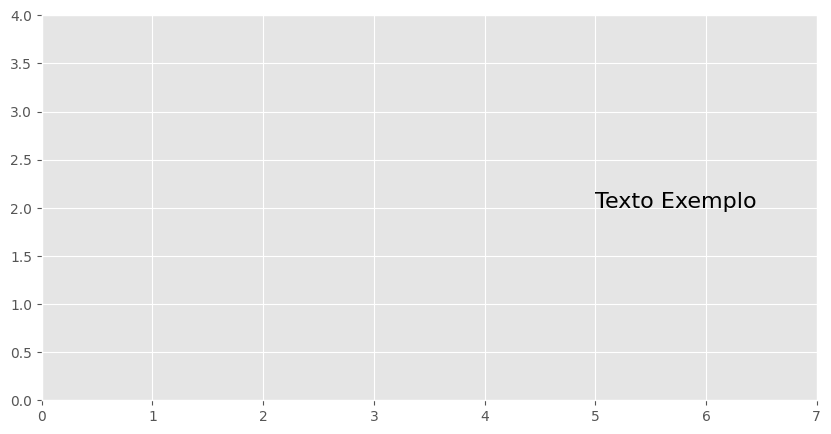

In [13]:
plt.text(5, 2, 'Texto Exemplo', size=16)

plt.xlim(0, 7)
plt.ylim(0, 4)

plt.show()

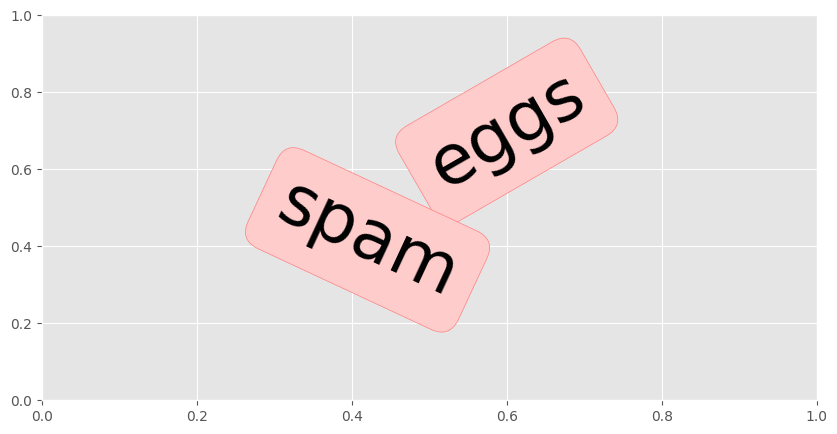

In [14]:
plt.text(0.6, 0.7, 'eggs', size=50,
         rotation=30.,
         ha='center', va='center',
         bbox=dict(boxstyle='round',
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8))
)

plt.text(0.55, 0.6, 'spam', size=50,
         rotation=-25.,
         ha='right', va='top',
         bbox=dict(boxstyle='round',
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8))
)

plt.show()

### Aplicando na prática

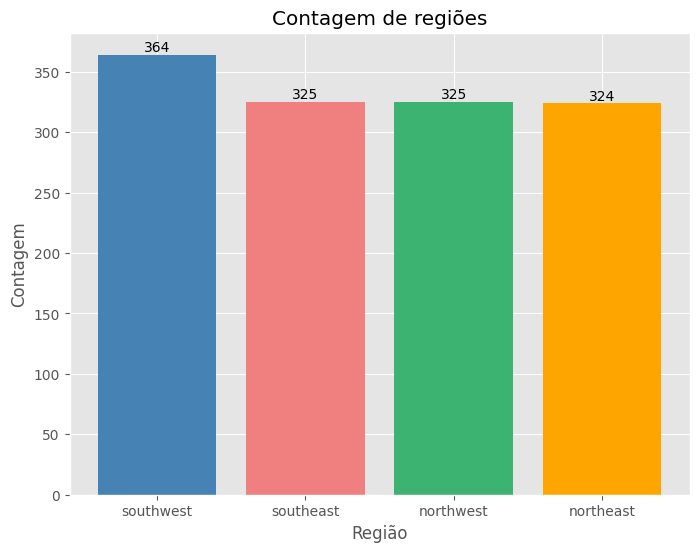

In [15]:
# Criando as contagens por região
region_types = insurance['region'].value_counts()

# Listamos as regiões existentes
region_names = insurance['region'].unique()

# Cores do gráfico
colors = ['steelblue', 'lightcoral', 'mediumseagreen', 'orange']

# Criando uma figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))

# Plotando o gráfico de barras
ax.bar(region_names, region_types.values, color=colors)

# Configurações dos rótulos dos eixos e título
ax.set_xlabel('Região')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de regiões')

# Adiciona a contagem para cada barra
for i, v in enumerate(region_types.values):
  ax.text(i, v, str(v), ha='center', va='bottom')

# Exibir
plt.show()

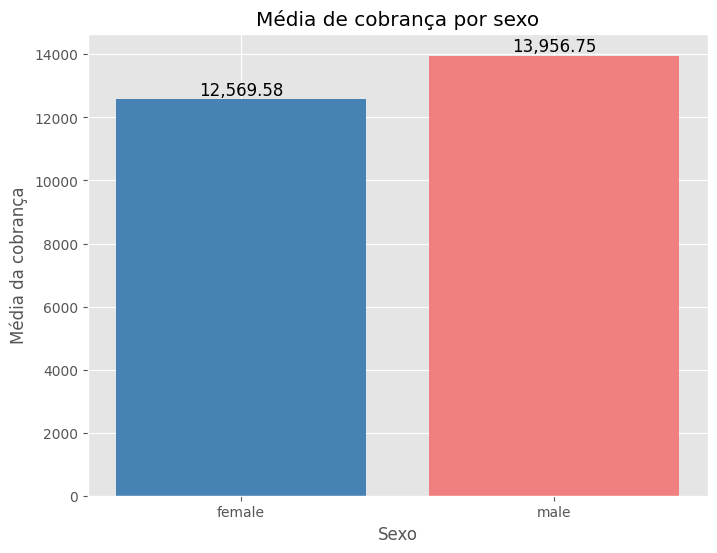

In [25]:
color = ['steelblue', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=color)

ax.set_xlabel('Sexo')
ax.set_ylabel('Média da cobrança')
ax.set_title('Média de cobrança por sexo')

ax.text(0, mean_charges_sex.values[0], f"{mean_charges_sex.values[0]:,.2f}",
        ha="center", va="bottom", fontsize=12)
ax.text(1, mean_charges_sex.values[1], f"{mean_charges_sex.values[1]:,.2f}",
        ha="center", va="bottom", fontsize=12)

plt.show()

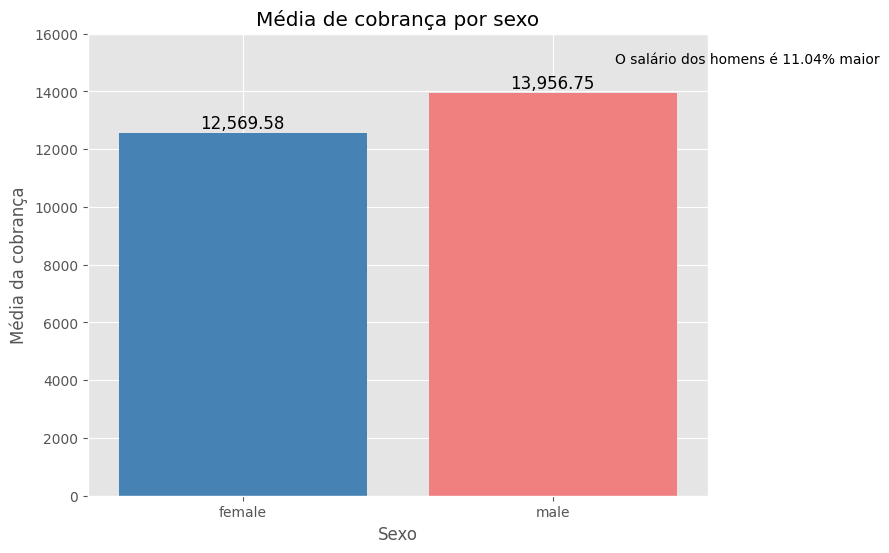

In [28]:
color = ['steelblue', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=color)

ax.set_xlabel('Sexo')
ax.set_ylabel('Média da cobrança')
ax.set_title('Média de cobrança por sexo')

ax.text(0, mean_charges_sex.values[0], f"{mean_charges_sex.values[0]:,.2f}",
        ha="center", va="bottom", fontsize=12)
ax.text(1, mean_charges_sex.values[1], f"{mean_charges_sex.values[1]:,.2f}",
        ha="center", va="bottom", fontsize=12)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 16000)

diff_percent = (mean_charges_sex['male'] - mean_charges_sex['female']) / mean_charges_sex['female'] * 100

ax.text(1.2, mean_charges_sex.values[1]+1000, f"O salário dos homens é {diff_percent:.2f}% maior")

plt.show()

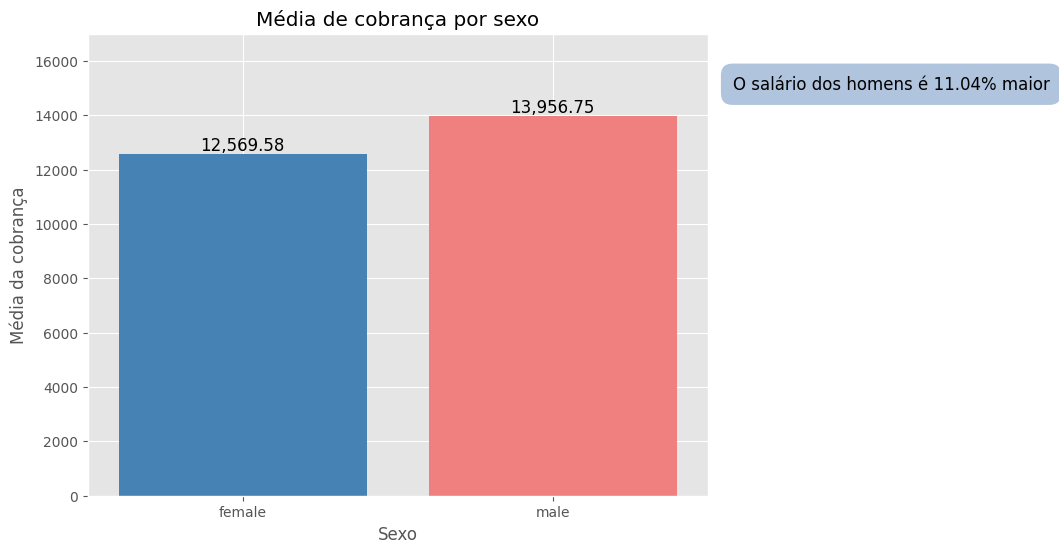

In [30]:
color = ['steelblue', 'lightcoral']

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(mean_charges_sex.index, mean_charges_sex.values, color=color)

ax.set_xlabel('Sexo')
ax.set_ylabel('Média da cobrança')
ax.set_title('Média de cobrança por sexo')

ax.text(0, mean_charges_sex.values[0], f"{mean_charges_sex.values[0]:,.2f}",
        ha="center", va="bottom", fontsize=12)
ax.text(1, mean_charges_sex.values[1], f"{mean_charges_sex.values[1]:,.2f}",
        ha="center", va="bottom", fontsize=12)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 17000)

diff_percent = (mean_charges_sex['male'] - mean_charges_sex['female']) / mean_charges_sex['female'] * 100

ax.text(1.58, mean_charges_sex.values[1]+1000, f"O salário dos homens é {diff_percent:.2f}% maior",
        bbox= {'facecolor': 'lightsteelblue',
               'alpha': 1,
               'pad': 0.7,
               'edgecolor': 'None',
               'boxstyle': 'round'},
        color='black',
        fontsize=12)

plt.show()

O parâmetro ***bbox (bounding box)*** é usado para definir as propriedades de uma caixa que envolve o texto. É uma forma de delimitar a área da caixa que será exibida.

As propriedades contidas no bbox são:

- **facecolor:** Define a cor de fundo da caixa. Neste exemplo, definimos como lightsteelblue, que é uma tonalidade de azul claro.

- **alpha:** Define a transparência da caixa. O valor 1 indica que a caixa é totalmente opaca, enquanto valores menores que 1 deixam a caixa mais transparente. Neste exemplo, definimos como 1, ou seja, totalmente opaca.

- **pad:** Define o espaçamento interno da caixa. É a distância entre o texto e as bordas da caixa. Quanto maior o valor, maior será o espaçamento. Neste exemplo, definimos como 0.7.

- **edgecolor:** Define a cor da borda da caixa. none significa que não há borda. Podem ser utilizados nomes de cores ou códigos hexadecimais para especificar uma cor. Neste exemplo, definimos como none.

- **boxstyle:** Define o estilo da caixa. round especifica que as bordas da caixa são arredondadas. Outros estilos disponíveis incluem square, round4, larrow, rarrow, roundtooth, entre outros.

Essas propriedades permitem personalizar a aparência da caixa que envolve o texto. Você pode ajustar os valores das propriedades conforme necessário para obter o estilo desejado.

Além das propriedades do bbox, também é possível definir outras configurações para o texto, como:

- **color:** Define a cor do texto. Neste exemplo, definimos como black, que é preto.

- **fontsize:** Define o tamanho da fonte do texto. Neste exemplo, definimos como 11.